**<font color='magenta'> NUMERICAL METHODS</font>**
***
**Students**


|         Full name         |   Username  |         Email         |
|---------------------------|-------------|-----------------------|
| Mohau Phohleli| Mohau  | mohau.phohleli@aims.ac.rw|
| Annette Dariose DIFFO MBOUDJIHO    | Annette    | dariose@aims.ac.za  |
| Alain Marcel Dikande Simo   | Simo   | alain.dikande@aims-cameroon.org  |

<font color='purple'>`Welcome to this notebook related to 2-state Continuous Time Markov Chain -- GILLESPIE`</font>

## 2-state Continuous Time Markov Chain

Continuous Time Markov Chains are a framework to describe systems where the state space is discrete (i.e. there is only a finite number of possibilities) but the dynamics happen in continuous time and are instrinsically *stochastic*.

Let us consider a system which can exist in one of two possible states $1$ or $2$. While in $1$, it can transition with some probability to state $2$, such that the probability for this transition, in time $dt$, is $\omega^+ dt$.

It is called a Markov chain because the probability depends only on the current configuration of the system (i.e. being in the state $1$ or $2$) but does not depend on time, or on the past history (i.e. the system is *memoryless*).

The dynamics of the two states are then described by the matrix of rates:

$$
  L =
  \left[ {\begin{array}{cc}
    \omega_{1,1} & \omega_{1,2} \\
    \omega_{2,1} & \omega_{2,2} \\
  \end{array} } \right]
$$

Such that $\omega_{i,j}$ is the flux from state $j$ to state $i$
In our case of two state, we can conviniently write

$$
  L =
  \left[ {\begin{array}{cc}
    -\omega^+ & \omega^- \\
    \omega^+ & -\omega^- \\
  \end{array} } \right]
$$

(Notice that the diagonal terms are just the opposite of the other terms, meaning the probability rate of state $1$ to remain in state $1$ is just *minus* its probability rate of going away...)

Formally, given the probability vector $\vec{P(t)} = ( P_1(t), P_2(t) )$, we can write the following partial differential equation for our system:

$$
\partial_t \vec{P(t)} = L \vec{P(t)}
$$

This defines the Master Equation, which is the equation that governs the evolution of the probability distribution in time. It has the solution:

$$
\vec{P(t)} = e^{Lt}\vec{P(0)}
$$

## Equivalence between stochastic realizations and probability evolution.

We have shown above that we can describe the evolution of the probabilities using the Master Equation. This is a "macroscopic" description.

We can also understand the "microscopic" description, i.e. single stochastic trajectories of the system, bouncing from one state to another in time. This trajectory will be defined by a sequence of times between jumps $\{ \tau_1, \tau_2, \dots, \tau_N\}$, such that the system which, e.g., starts at $1$ then has a trajectory:

$$
\begin{eqnarray}
S(t)=1, && 0<t<\tau_1 \\
&↓& \\
S(t)=2,&& \tau_1<t<\tau_1+\tau_2  \\
&↓&  \\
S(t) = 1,&& \tau_1+\tau_2<t<\tau_1+\tau_2+\tau_3  \\
&↓&  \\
&…& \\
\end{eqnarray}
$$

Then, the probability $\vec{P(t)}$ will describe the probability that *any* single trajectory is in one state or another at time $t$. Empirically, with a number $\#_{trajs}$ of trajectories, we can approximate the number of trajectories that are in that state at that time.

$$
P_1^{empirical}(t) = \frac{1}{\#_{trajs}}\sum_{trajs} \delta(S(t)=1)
$$

where $\delta(\cdot )$ is the Kronecker delta. **Fundamentally, this is the equivalence that you need to numerically demonstrate in the project.**

But, how can one simulate single instances of *stochastic* trajectories, given a starting configuration ($\vec{P(0)}$) and a matrix of transition rates ($L$)?

## Gillespie Algorithm.

The Gillespie Algorithm is a method to extract the transition times $\{\tau_i\}$ for a trajectory. The central idea is that, since the transition rates are homogeneous (constant) in time, the distribution of transition times is exponential.

That is, the rate of leaving the state $1$ ($2$) is $\omega^+$ ($\omega^-$). We can then extract the time of residency (i.e., the time *until* the next jump) as:

$$
\tau = r \frac{1}{\omega^+}
$$

Where $r$ is an exponentially distributed random variable. Recall that, to transform a uniformly distributed number $u$ into an exponenetially distributed number $r$ one has to perform the following transformation:

$$
r = \text{ln} (1/u)
$$

## Project.

- Consider different values of $\omega^+$ and $\omega^-$, and calculate analytically (and plot) the result for $\vec{P(t)}$, using $\vec{P(0)}=(1,0)$. (Note that it is sufficient to plot $P_1(t)$)
- Study the steady state probabilities (what is $\lim_{t→∞}\vec{P(t)}$?)
- Construct a function that generates a stochastic trajectory of jumping times up to a maximum time $T$
- Generates a large number of trajectories, and for a selection of times between $0$ and $T$ compare the empirical probability $P_1^{empirical}(t)$ with the analytical prediction $P_1(t)$

- Calculate the instantaneous average current between the two states. You should start away from the stationary states, which should reach zero at long times.

<h1>PROPOSAL OF SOLUTION</h1>

## Consider different values of $\omega^+$ and $\omega^-$, and calculate analytically (and plot) the result for $\vec{P(t)}$, using $\vec{P(0)}=(1,0)$. (Note that it is sufficient to plot $P_1(t)$)

**Let's consider different values of $\omega^+$ and $\omega^-$, and calculate analytically (and plot) the result for $\vec{P(t)}$, using $\vec{P(0)}=(1,0)$. (Note that it is sufficient to plot $P_1(t)$)**

We begin by solving analytically the equation:
$$
\partial \vec{P(t)} = L\vec{P}
$$
Where $$ \vec{P}(t) = (P_1(t),P_2(t)) $$ and
$$
  L =
  \left[ {\begin{array}{cc}
    -\omega^+ & \omega^- \\
    \omega^+ & -\omega^- \\
  \end{array} } \right]
$$. Given that $$ P_1 \text{ and } P_2$$ are complementary, it is sufficient to solve for $$ P_1(t)$$ with the condition $$ P_1(0) = 1$$


<h1> Derivation of the analytical solution </h1>
$$ \partial \vec{P(t)} = L\vec{P} $$

$$  \frac{\partial}{\partial t} \begin{align} \begin{bmatrix} P_1 \\ P_2 \end{bmatrix} \end{align} = \left[ {\begin{array}{cc}
    -\omega^+ & \omega^- \\
    \omega^+ & -\omega^- \\
  \end{array} } \right] \begin{bmatrix} P_1 \\ P_2 \end{bmatrix}, $$

$$ \frac{\partial}{\partial t} P_1 = -\omega^+P_1 + \omega^- P_2 $$

we know that  $P_1 + P_2 = 1$, we can thus write:

$$ \frac{\partial}{\partial t} P_1 = -\omega^+P_1  + \omega^-(1-P_1), $$

$$ \frac{\partial}{\partial t} P_1 + (\omega^+ + \omega^-)P_1 = \omega^-$$

The above is a first order ODE whose solution is of the form:

$$ P_1(t) = \exp^{-\int p(t)dt} \left[ \int \exp^{(\int p(t)dt)}f(t)dt + C \right] $$

Where $p(t) = \omega^+ + \omega^-$, $f(t) = \omega^-$ and after adding the initial confition, $ C = \frac{\omega^+}{\omega^+ + \omega^-}$.

<h1> Analytical Solution </h1>


$$ P_1(t) = \frac{\omega^-}{\omega^+ + \omega^-} + \frac{\omega^+}{\omega^+ + \omega^-}\exp^{-(\omega^+ + \omega^-)t} $$

<h1> Plots </h1>
Below we present three plot for the analytical solution for the following three cases(for ease, we let $\omega^+<1$ and $\omega^- < 1$ ):
- When $\omega^+ < \omega^-$
- When $\omega ^+ = \omega^-$
- when $\omega^+ > \omega^-$

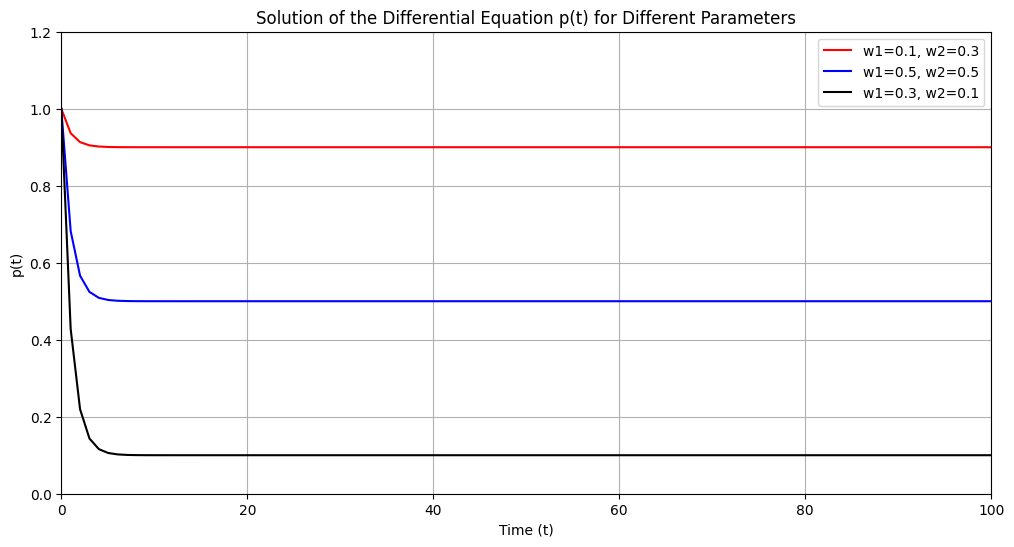

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Define the function for p(t) based on the rates w1 and w2
p1 = lambda t, w1, w2: w2 / (w1 + w2) + (w1 / (w1 + w2)) * np.exp(-(w1 + w2) * t)

# Create a time array from 0 to 100 with 100 points
t = np.linspace(0, 100, 100)

# Initialize the plotting area with a specified figure size
plt.figure(figsize=(12, 6))

# Plot each curve for different pairs of (w1, w2) with specific colors and labels
plt.plot(t, p1(t, 0.1, 0.9), color='red', label='w1=0.1, w2=0.3')
plt.plot(t, p1(t, 0.5, 0.5), color='blue', label='w1=0.5, w2=0.5')
plt.plot(t, p1(t, 0.9, 0.1), color='black', label='w1=0.3, w2=0.1')

# Adding a title and axis labels to the plot
plt.title('Solution of the Differential Equation p(t) for Different Parameters')
plt.xlabel('Time (t)')
plt.ylabel('p(t)')

# Set the limits for the x and y axes
plt.xlim(0, 100)
plt.ylim(0, 1.2)

# Add a grid to the plot for better readability
plt.grid()

# Display the legend to identify different curves
plt.legend()

# Show the plot on the screen
plt.show()

**Let's study the steady state probabilities (what is $\lim_{t→∞}\vec{P(t)}$?)**

As $$t \to \infty$$, $$P_1 \to \frac{\omega^-}{\omega^+ + \omega^-}.$$

This is consistent with the plots, for differents values of the parameters.

<h1>Let's construct a function that generates a stochastic trajectory of jumping times up to a maximum time $T$ and generates a large number of trajectories, and for a selection of times between $0$ and $T$ </h1>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def trajectories(omega_plus, omega_minus, max_time, num_of_traj):
    # Initialize lists to hold the states and times for each trajectory
    list_of_states = []
    list_of_times = []

    # Generate the specified number of trajectories
    for i in range(num_of_traj):
        # Define possible states
        states = list((1,2,1.1,2.1))
        curr_state = 1  # Start in state 1
        another_list = []  # List to hold the states for the current trajectory
        another_list.append(1)  # Append the initial state

        t = 0  # Initialize time
        tau = 0  # Time increment
        times = [t]  # List to hold the time points
        jump = 0

        # Continue until the maximum time is reached
        while t < max_time:
            # Generate a random number for the exponential distribution
            # r = np.random.exponential(scale=0.1)  # This line is commented out
            u = np.random.uniform()  # Generate a uniform random number between 0 and 1
            r = np.log(1/u)  # Transform the uniform random variable to exponential

            # Transition to the next state based on the current state
            if curr_state == 1:
                tau = r / omega_plus  # Time to transition
                if u>omega_plus:
                  curr_state = states[2]  # Update to state 2
                else:
                  curr_state = states[1]
            else:
                tau = r / omega_minus  # Time to transition to state 1
                if u<omega_minus:
                  curr_state = states[3]  # Update to state 2
                else:
                  curr_state = states[0]
            t += tau  # Increment the current time
            another_list.append(curr_state)  # Record the current state
            if curr_state == 1.1:
              curr_state = states[0]
            elif curr_state == 2.1:
              curr_state = states[1]
            times.append(t)  # Record the current time

        # Append the completed trajectory data to the lists
        list_of_states.append(another_list)
        list_of_times.append(times)

    return list_of_states, list_of_times  # Return the lists of states and times

In [ ]:
list_of_states1, list_of_times1 = trajectories(0.3, 0.7,1000,200)
list_of_states2, list_of_times2 = trajectories(0.5, 0.5,1000,200)
list_of_states3, list_of_times3 = trajectories(0.7, 0.3,1000,200)

In [ ]:
list_of_states1

[[1,
  1,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  2,
  2,
  1,
  1,
  1,
  2,
  2,
  2,
  1,
  1,
  2,
  2,
  2,
  1,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  2,
  2,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  2,
  2,
  2,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  1,
  1,
  1,
  1,


In [ ]:
for i in range(len(list_of_states1)):
  for j in range(len(list_of_states1[i])):
    if list_of_states1[i][j] == 1.1:
      list_of_states1[i][j] = 1
    elif list_of_states1[i][j] == 2.1:
      list_of_states1[i][j] = 2
for i in range(len(list_of_states2)):
  for j in range(len(list_of_states2[i])):
    if list_of_states2[i][j] == 1.1:
      list_of_states2[i][j] = 1
    elif list_of_states2[i][j] == 2.1:
      list_of_states2[i][j] = 2
for i in range(len(list_of_states3)):
  for j in range(len(list_of_states3[i])):
    if list_of_states3[i][j] == 1.1:
      list_of_states3[i][j] = 1
    elif list_of_states3[i][j] == 2.1:
      list_of_states3[i][j] = 2

Text(0.5, 1.0, 'w1 > w2')

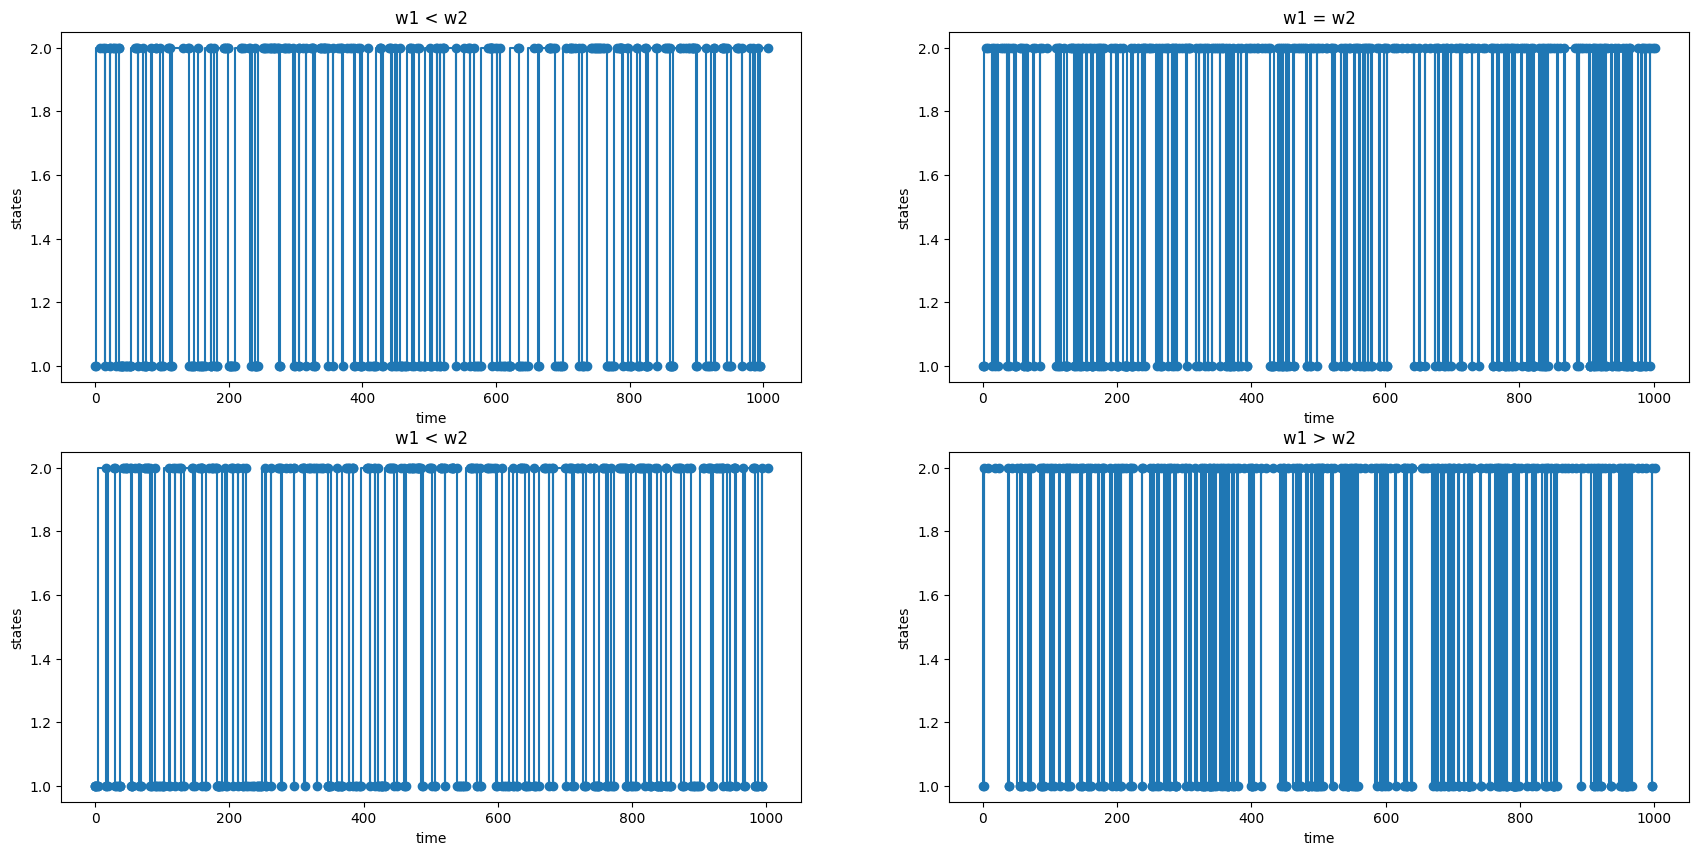

In [ ]:
fig = plt.figure(figsize=(21,10))

plt.subplot(221)
plt.step(list_of_times1[0],list_of_states1[0])
plt.scatter(list_of_times1[0],list_of_states1[0])
plt.xlabel("time")
plt.ylabel("states")
plt.title("w1 < w2")

plt.subplot(222)
plt.step(list_of_times2[25],list_of_states2[25])
plt.scatter(list_of_times2[25],list_of_states2[25])
plt.xlabel("time")
plt.ylabel("states")
plt.title("w1 = w2")


plt.subplot(223)
plt.step(list_of_times1[112],list_of_states1[112])
plt.scatter(list_of_times1[112],list_of_states1[112])
plt.xlabel("time")
plt.ylabel("states")
plt.title("w1 < w2")

plt.subplot(224)
plt.step(list_of_times3[178],list_of_states3[178])
plt.scatter(list_of_times3[178],list_of_states3[178])
plt.xlabel("time")
plt.ylabel("states")
plt.title("w1 > w2")

In [ ]:
def probability(states, Times, time):
    total_probabilities = 0  # Initialize a variable to accumulate probabilities

    for k in range(len(states)):  # Iterate through each trajectory
        # Find the first index where Time is >= time using a generator expression
        index = next((j for j in range(len(Times[k])) if Times[k][j] >= time), len(Times[k]))

        # Count the number of ones in the relevant slice of states
        count_of_ones = states[k][:index].count(1)

        # Calculate the local probability
        local_probability = count_of_ones / index if index > 0 else 0  # Avoid division by zero
        total_probabilities += local_probability

    # Return the average probability
    return total_probabilities / len(states) if states else 0

In [ ]:
-

In [ ]:
def proba(list_of_states, list_of_times, max_time):
    # Initialize empty lists to store probabilities and corresponding times
    proba = list()
    timess = list()

    # Loop over each time step from 0 to max_time (exclusive)
    for i in range(max_time):
        # Append the current time step to the timess list
        timess.append(i)
        # Calculate the probability for the current time i and add it to the proba list
        proba.append(probability(list_of_states, list_of_times, i))

    # Return the list of probabilities and the corresponding times
    return proba, timess

In [ ]:
proba1, timess1 = proba(list_of_states1, list_of_times1, 1000)
proba2, timess2 = proba(list_of_states2, list_of_times2, 1000)
proba3, timess3 = proba(list_of_states3, list_of_times3, 1000)

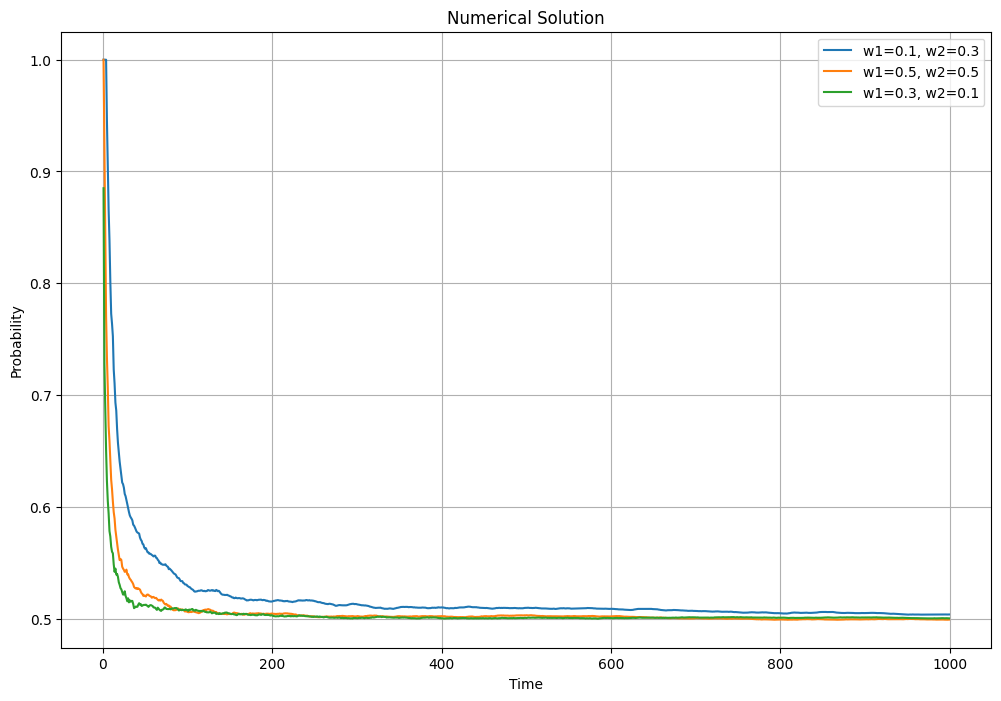

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(timess1[1:],proba1[1:], label='w1=0.1, w2=0.3')
plt.plot(timess2[1:],proba2[1:], label='w1=0.5, w2=0.5')
plt.plot(timess3[1:],proba3[1:], label='w1=0.3, w2=0.1')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title("Numerical Solution")
plt.legend()
plt.grid()

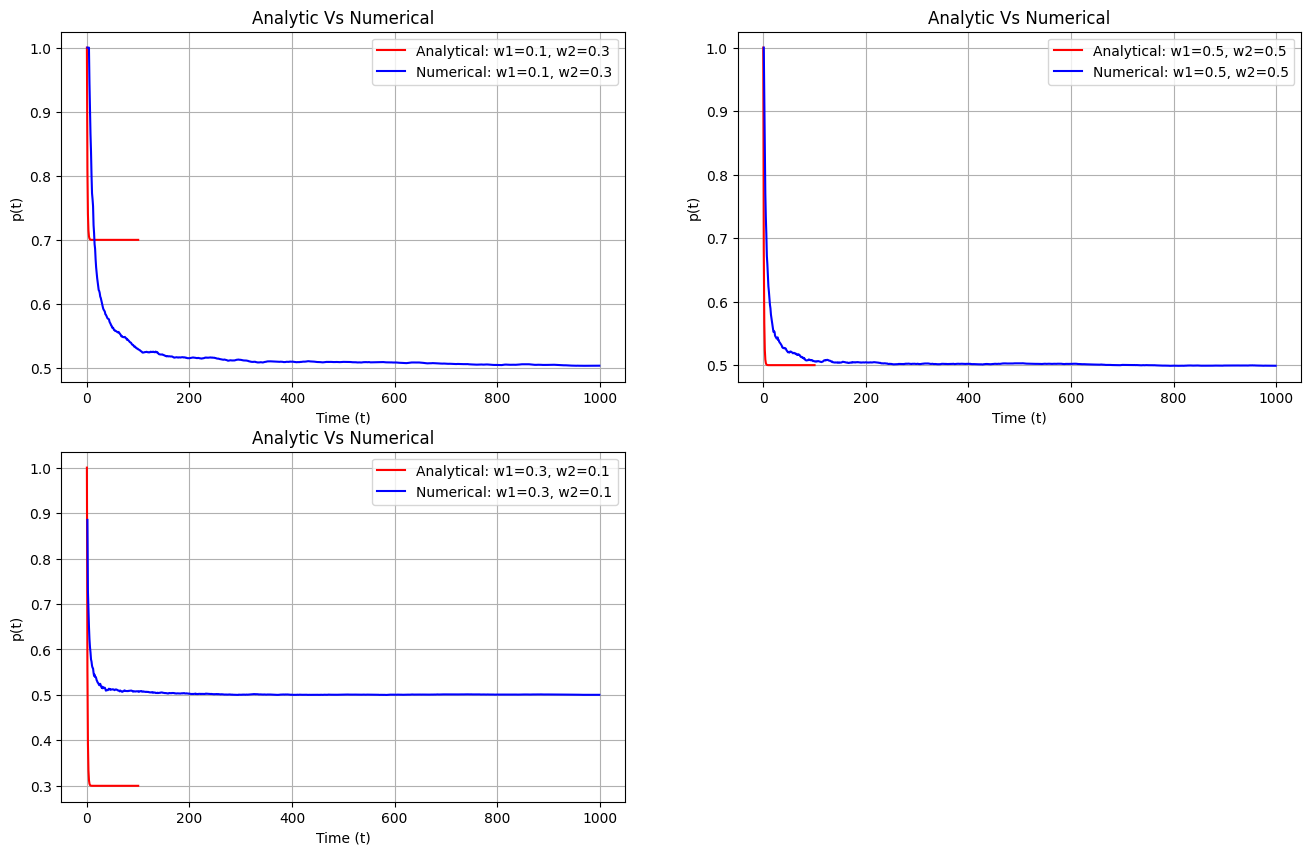

In [ ]:
#**compare the empirical probability $P_1^{empirical}(t)$ wifig = plt.figure(figsize=(16,10))
fig = plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(t, p1(t, 0.3, 0.7), color='red', label='Analytical: w1=0.1, w2=0.3')
plt.plot(timess1[1:],proba1[1:], color='blue', label='Numerical: w1=0.1, w2=0.3')
plt.title('Analytic Vs Numerical')
plt.xlabel('Time (t)')
plt.ylabel('p(t)')
plt.grid()
# Show legend
plt.legend()


plt.subplot(222)
plt.plot(t, p1(t, 0.5, 0.5), color='red', label='Analytical: w1=0.5, w2=0.5')
plt.plot(timess2[1:],proba2[1:], color='blue', label='Numerical: w1=0.5, w2=0.5')
plt.title('Analytic Vs Numerical')
plt.xlabel('Time (t)')
plt.ylabel('p(t)')
plt.grid()
# Show legend
plt.legend()


plt.subplot(223)
plt.plot(t, p1(t, 0.7, 0.3), color='red', label='Analytical: w1=0.3, w2=0.1')
plt.plot(timess3[1:],proba3[1:], color='blue', label='Numerical: w1=0.3, w2=0.1')
plt.title('Analytic Vs Numerical')
plt.xlabel('Time (t)')
plt.ylabel('p(t)')
plt.grid()
# Show legend
plt.legend()



#Calculate the instantaneous average current between the two states. You should start away from the stationary states, which should reach zero at long times.

##  Compute the Instantaneous Average Current \( J(t) \)

The formula for the instantaneous average current is:

$J(t) = \omega^+ P_2(t) - \omega^- P_1(t).$

Substituting the expressions for $ P_1(t)  \text{ and }  P_2(t) $:

$J(t) = \omega^+ \left[\left(1 - \frac{\omega^-}{\omega^+ + \omega^-}\right) e^{-(\omega^+ + \omega^-) t} + \frac{\omega^-}{\omega^+ + \omega^-}\right] - \omega^- \left(\frac{\omega^+}{\omega^+ + \omega^-}\right) \left(1 - e^{-(\omega^+ + \omega^-) t}\right).
$

$J(t) = (\omega^+ + \omega^-) \left(\frac{\omega^+ \omega^-}{(\omega^+ + \omega^-)^2}\right) e^{-(\omega^+ + \omega^-) t}.$

## Analyze the Long-Term Behavior

As $ t \to \infty$:

$e^{-(\omega^+ + \omega^-) t} \to 0,$

so:

$J(\infty) = 0.$

This confirms that the instantaneous average current \( J(t) \) decays to zero over time as the system reaches equilibrium.

In [ ]:
def probability_2(p1):
  proba2 = list()
  for i in range(len(p1)):
    proba2.append(1-p1[i])
  return proba2

probab1 = probability_2(proba1)
probab2 = probability_2(proba1)
probab3  = probability_2(proba1)

def current(proba1, proba2, omega_plus, omega_minus):
  J = list()
  for i in range(len(proba1)):
    J.append(omega_plus*proba2[i]-omega_minus*proba1[i])
  return J
J1 = current(proba1,probab2,0.1,0.3)
J2 = current(proba1,probab2,0.5,0.5)
J3 = current(proba1,probab2,0.3,0.1)

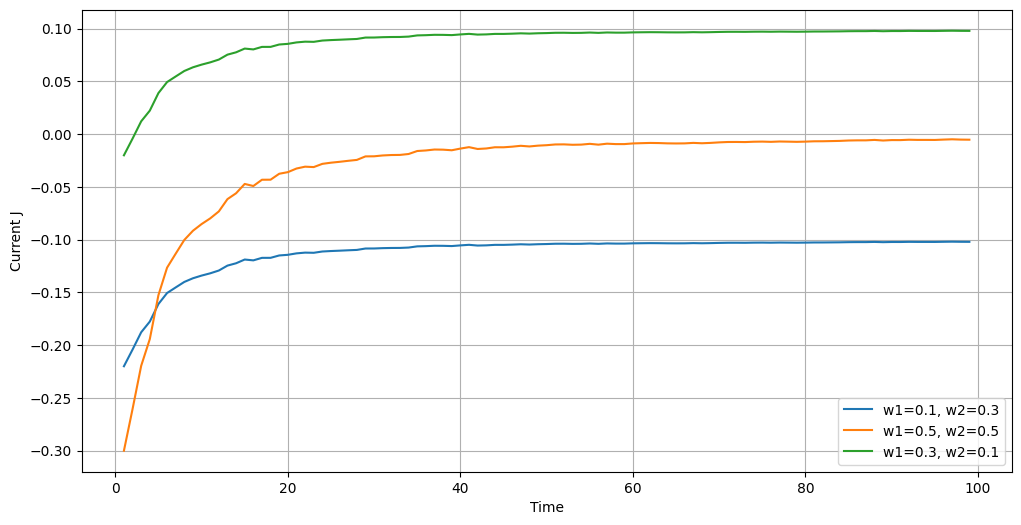

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(timess1[1:],J1[1:], label='w1=0.1, w2=0.3')
plt.plot(timess3[1:],J2[1:], label='w1=0.5, w2=0.5')
plt.plot(timess3[1:],J3[1:], label='w1=0.3, w2=0.1')
plt.xlabel('Time')
plt.legend()
plt.ylabel('Current J')
plt.grid()

# Real life example
- Page Ranking
- Language model

# References
- Prof. Matteo Marsili
- Wikipedia
- <a href='https://www.sfu.ca/math-coursenotes/Math%20158%20Course%20Notes/sec_first_order_homogeneous_linear.html'> First Order Linear Differential Equations

In [ ]:
import numpy as np
r1 = np.random.uniform(0,1)
r2 = np.random.uniform(0,1)
w12 = 0.3
w21 = 0.6
s = 1
t = 0
a0 = w12
a1 = w21
if r2 <= w12/a0:
  tau = 1/w12*np.log(1/r1)
  s = 2
else:
  tau = 1/w21*np.log(1/r1)
  s = 1
t += tau

In [ ]:
# Update the time


Time: 0.4977, State: 1


44


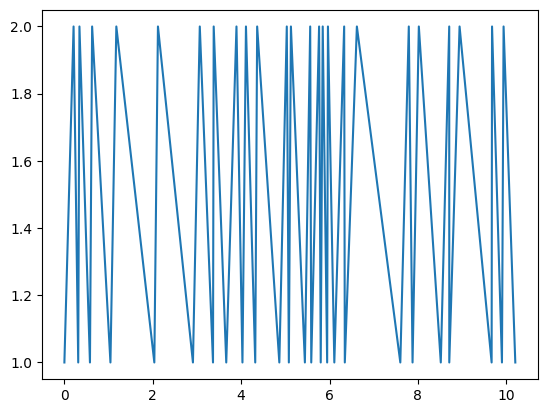

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Gillipse(w12, w21, max_time):
    s = 1  # initial state
    t = 0  # initial time
    dic = {t:s}

    while t < max_time:
        if s == 1:
            tau = np.random.exponential(1/w21)  # time to switch to state 2
            s = 2
        else:
            tau = np.random.exponential(1/w12)  # time to switch to state 1
            s = 1
        t += tau
        dic[t] = s

    return dic
# Generate the dictionary of time-state pairs
state_dict = Gillipse(3, 5, 10)
# Generate times and states
Times = list(state_dict.keys())
States = list(state_dict.values())


plt.plot(Times, States)


In [ ]:
import numpy as np

def empirical_probability(w12, w21, max_time, n_trajectories, target_time):
    count = 0

    for i in range(n_trajectories):
        # Generate the trajectory for each trajectory
        state_dict = Gillipse(w12, w21, max_time)

        # Check if the system is in state 1 at the target time
        times = list(state_dict.keys())

        # Find the largest time in state_dict that is <= target_time
        t_before = max([time for time in times if time <= target_time], default=None)

        if t_before is not None and state_dict[t_before] == 1:
            count += 1

    # Return the empirical probability of being in state 1 at target_time
    return count / n_trajectories

# Test the function with example parameters
prob = empirical_probability(3, 5, 10, 1000, 1)  # Check at time t = 2
print(f"Empirical probability at time t=2: {prob}")


Empirical probability at time t=2: 0.414


In [ ]:
p1 = lambda t, w21, w12: w12 / (w12 + w21) + (w21 / (w12 + w21)) * np.exp(-(w21 + w12) * t)
p1(2, 3, 5)

0.6250000422006905

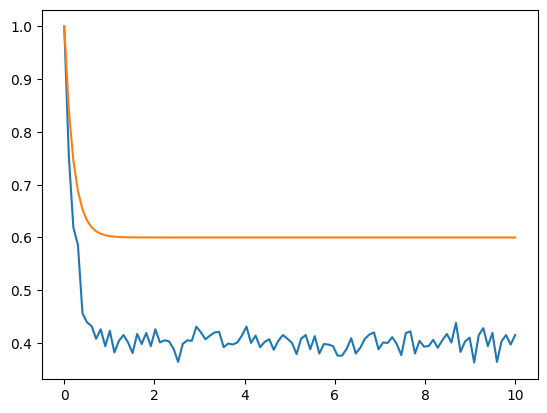

In [ ]:
Time = np.linspace(0, 10, 100)
Prob_emprical = [empirical_probability(2, 3, 10, 1000, i) for i in Time]
Prob_actual = [p1(i, 2, 3) for i in Time]
plt.plot(Time, Prob_emprical)
plt.plot(Time, Prob_actual)


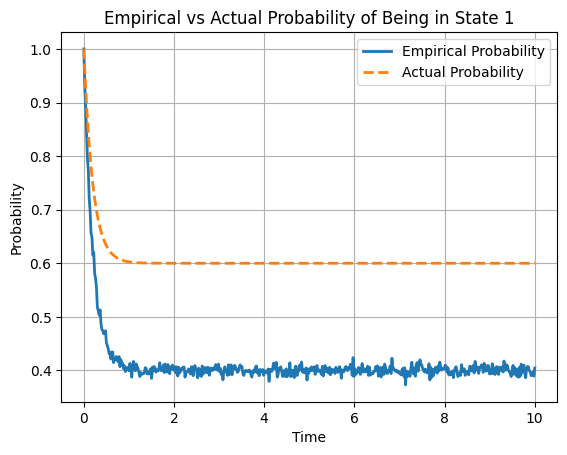

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the analytical probability function
p1 = lambda t, w21, w12: (w12 / (w12 + w21)) + (w21 / (w12 + w21)) * np.exp(-(w21 + w12) * t)

# Empirical Probability Function (assuming it's defined earlier)
# Note: You should already have `empirical_probability` defined as shown in your earlier code

# Generate time points from 0 to 10, with a higher resolution
Time = np.linspace(0, 10, 500)  # Increased number of points to 500 for smoother curves

# Increase the number of trajectories to improve the empirical probability estimate
n_trajectories = 5000  # Higher number of trajectories for better convergence

# Calculate the empirical probability for each time point
Prob_emprical = [empirical_probability(2, 3, 10, n_trajectories, i) for i in Time]

# Calculate the actual probability for each time point
Prob_actual = [p1(i, 2, 3) for i in Time]

# Plot both empirical and actual probabilities
plt.plot(Time, Prob_emprical, label="Empirical Probability", linewidth=2)
plt.plot(Time, Prob_actual, label="Actual Probability", linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.title('Empirical vs Actual Probability of Being in State 1')
plt.grid(True)
plt.show()


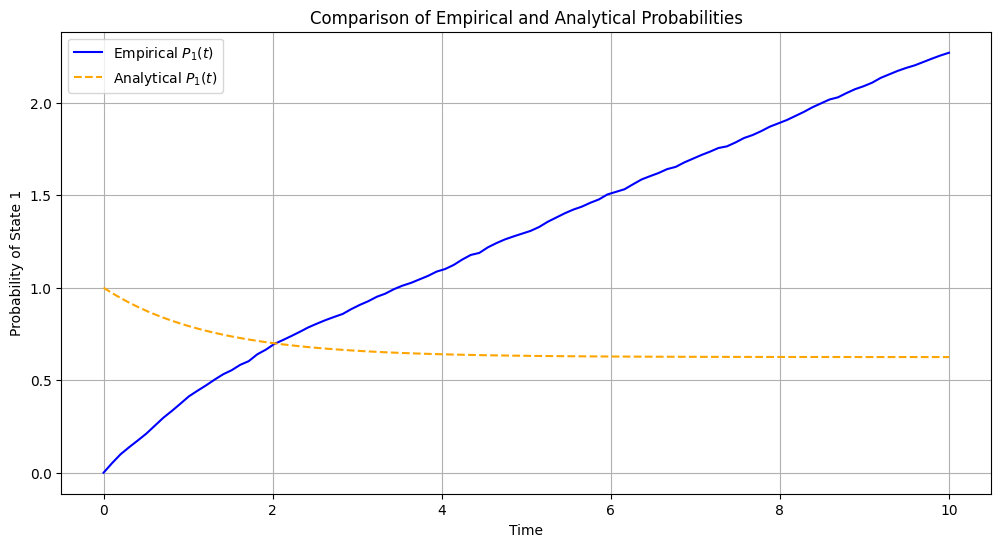

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the Gillespie Algorithm
def gillespie_algorithm(omega_plus, omega_minus, T):
    state = 1  # Initial state
    time = 0
    trajectory = []
    times = []

    while time < T:
        if state == 1:
            r1 = np.random.rand()
            tau = -np.log(1 - r1) / omega_plus  # Exponential waiting time
            time += tau
            if time < T:
                trajectory.append(state)
                times.append(time)
                state = 2  # Jump to state 2
        else:
            r2 = np.random.rand()
            tau = -np.log(1 - r2) / omega_minus  # Exponential waiting time
            time += tau
            if time < T:
                trajectory.append(state)
                times.append(time)
                state = 1  # Jump to state 1

    return times, trajectory

# Step 2: Calculate the analytical probability P1(t)
def analytical_probability(t, omega_plus, omega_minus):
    p1_steady = omega_plus / (omega_plus + omega_minus)
    return p1_steady + (1 - p1_steady) * np.exp(-(omega_plus + omega_minus) * t)

# Step 3: Empirical Probability Calculation
def empirical_probability(traj_list, T, num_times=100):
    times = np.linspace(0, T, num_times)
    counts = np.zeros(num_times)

    for traj in traj_list:
        traj_times, traj_states = traj
        for i, t in enumerate(times):
            counts[i] += sum(1 for time in traj_times if time < t and traj_states[traj_times.index(time)] == 1)

    return counts / len(traj_list)

# Step 4: Main Simulation Parameters
omega_plus = 0.5
omega_minus = 0.3
T = 10  # Maximum time
num_trajectories = 1000

# Step 5: Generate multiple trajectories
trajectories = [gillespie_algorithm(omega_plus, omega_minus, T) for _ in range(num_trajectories)]

# Step 6: Calculate empirical probabilities
empirical_probs = empirical_probability(trajectories, T)

# Step 7: Calculate analytical probabilities for plotting
times = np.linspace(0, T, 100)
analytical_probs = [analytical_probability(t, omega_plus, omega_minus) for t in times]

# Step 8: Plot results
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, T, 100), empirical_probs, label='Empirical $P_1(t)$', color='blue')
plt.plot(times, analytical_probs, label='Analytical $P_1(t)$', linestyle='dashed', color='orange')
plt.title('Comparison of Empirical and Analytical Probabilities')
plt.xlabel('Time')
plt.ylabel('Probability of State 1')
plt.legend()
plt.grid()
plt.show()

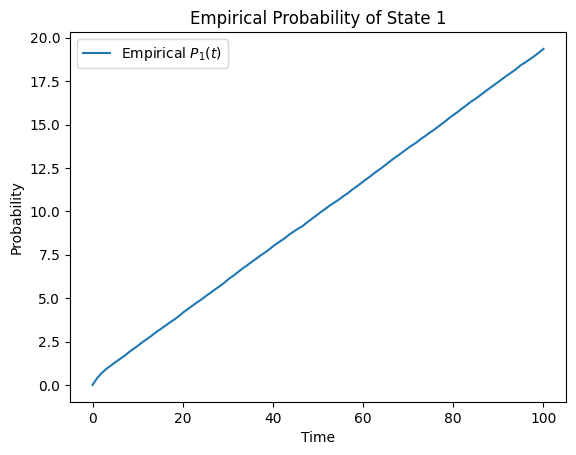

In [ ]:
def empirical_probability(traj_list, T, num_times=100):
    times = np.linspace(0, T, num_times)
    counts = np.zeros(num_times)

    for traj in traj_list:
        for i, t in enumerate(times):
            counts[i] += sum(1 for time in traj[0] if time < t and traj[1][traj[0].index(time)] == 1)

    return counts / len(traj_list)

# Generate multiple trajectories
num_trajectories = 1000
trajectories = [gillespie_algorithm(omega_plus, omega_minus, T) for _ in range(num_trajectories)]
empirical_probs = empirical_probability(trajectories, T)

# Plot empirical probability
plt.plot(np.linspace(0, T, 100), empirical_probs, label='Empirical $P_1(t)$')
plt.title('Empirical Probability of State 1')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

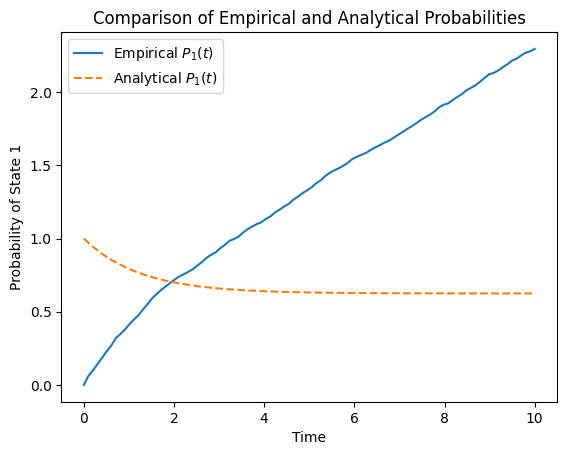

In [ ]:
def analytical_probability(t, omega_plus, omega_minus):
    return omega_plus / (omega_plus + omega_minus) + (1 - omega_plus / (omega_plus + omega_minus)) * np.exp(-(omega_plus + omega_minus) * t)

# Calculate analytical probabilities
times = np.linspace(0, T, 100)
analytical_probs = [analytical_probability(t, omega_plus, omega_minus) for t in times]

# Plot both empirical and analytical probabilities
plt.plot(times, empirical_probs, label='Empirical $P_1(t)$')
plt.plot(times, analytical_probs, label='Analytical $P_1(t)$', linestyle='dashed')
plt.title('Comparison of Empirical and Analytical Probabilities')
plt.xlabel('Time')
plt.ylabel('Probability of State 1')
plt.legend()
plt.show()

In [ ]:
def instantaneous_current(trajectories, time_index):
    # Count transitions at each time index
    J = 0
    for traj in trajectories:
        if traj[1][time_index] == 1:
            J += omega_plus
        else:
            J -= omega_minus
    return J / len(trajectories)

# Calculate instantaneous current at various times
current_values = [instantaneous_current(trajectories, i) for i in range(num_times)]

# Plot current
plt.plot(np.linspace(0, T, num_times), current_values)
plt.title('Instantaneous Average Current between States')
plt.xlabel('Time')
plt.ylabel('Current')
plt.show()

NameError: name 'num_times' is not defined

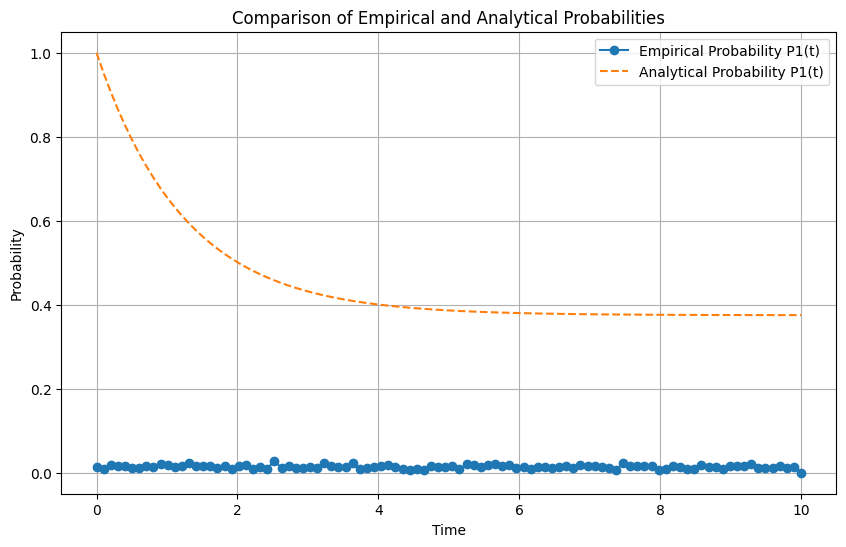

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega_plus = 0.5
omega_minus = 0.3
T = 10
num_trajectories = 1000
num_time_points = 100

# Analytical Solution
def analytical_solution(t):
    P1_t = omega_minus / (omega_plus + omega_minus) + (1 - omega_minus / (omega_plus + omega_minus)) * np.exp(-(omega_plus + omega_minus) * t)
    return P1_t

# Gillespie Algorithm
def gillespie_algorithm(T, omega_plus, omega_minus):
    times = []  # List to store time points
    states = []  # List to store the state of each trajectory

    # Initial state
    state = 1
    time = 0

    while time < T:
        if state == 1:
            rate = omega_plus
        else:
            rate = omega_minus

        # Time until the next jump
        tau = np.random.exponential(1/rate)
        time += tau

        if time >= T:
            break

        # Transition based on the current state
        if state == 1:
            state = 2 if np.random.rand() < omega_plus / (omega_plus + omega_minus) else state
        else:
            state = 1 if np.random.rand() < omega_minus / (omega_plus + omega_minus) else state

        times.append(time)
        states.append(state)

    return np.array(times), np.array(states)

# Simulate trajectories
all_states = np.zeros((num_trajectories, num_time_points))  # Initialize a 2D array for states

for i in range(num_trajectories):
    times, states = gillespie_algorithm(T, omega_plus, omega_minus)
    # Fill the state array with the results
    for j, t in enumerate(times):
        time_index = int((t / T) * (num_time_points - 1))  # Normalize time to index
        all_states[i, time_index] = states[j]

# Calculate empirical probabilities
empirical_probs = np.mean(all_states == 1, axis=0)  # Calculate the average across trajectories

# Analytical probabilities
time_points = np.linspace(0, T, num_time_points)
analytical_probs = analytical_solution(time_points)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_points, empirical_probs, label='Empirical Probability P1(t)', marker='o')
plt.plot(time_points, analytical_probs, label='Analytical Probability P1(t)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Comparison of Empirical and Analytical Probabilities')
plt.legend()
plt.grid()
plt.show()